In [1]:


#-*- coding : utf-8 -*-
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_table('data1.csv',encoding='unicode_escape',sep=",",index_col=0,names=range(1,10))
train_data.head()

,1,2,3,4,5,6,7,8,9
1,2019,MAG,Medical Xpress,A,B,C,"College of Georgia, Augusta, Georgia, and Th...",Gastroesophageal reflux associated with chroni...,"whom 69% (1048) were women, to understand the ..."
2,2019,ACAD,Journal of Shipping and Trade,A,B,C,# 0 # 0.000 # Shandong # Jinan # 2 # 0.054 #...,Evaluation of e-commerce location and entry to...,# Haikou # 1 # 0.027 # Hebei # Shijiazhuang # ...
3,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"# (a) Department of Neurology, People's Hosp...",Association Between the Lipid Profile and Rena...,"Altun B, Barutcu A, Gazi E, Gunec F, Yilmaz M:..."
4,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"(b) First Department of Cardiology, People's...",Association Between the Lipid Profile and Rena...,red cell distribution width and long-term mort...
5,2019,ACAD,Kidney Blood Pressure Research,A,B,C,"(c) Department of Ultrasonic Center, Northwe...",Association Between the Lipid Profile and Rena...,J Cardiol 2015; 15:634-639. # Hong Zhang (a) S...


In [2]:
#从文件导入停用词表
stpwrdpath = "stop_words.txt"
stpwrd_dic = open(stpwrdpath,encoding='utf8')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()
#print(stpwrdlst)

In [3]:

from sklearn.feature_extraction.text import TfidfVectorizer
# 加入停顿词
vector = TfidfVectorizer(stop_words=stpwrdlst)
tfidf = vector.fit_transform(train_data[9])


E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  sorted(inconsistent))


In [4]:
wordlist = vector.get_feature_names()#获取词袋模型中的所有词  
# tf-idf矩阵 元素a[i][j]表示j词在i类文本中的tf-idf权重
weightlist = tfidf.toarray()  
#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
#for i in range(len(weightlist)):  
for i in range(3):  
    print ("-------第",i,"段文本的词语tf-idf权重------")
    for j in range(len(wordlist)):  
        if weightlist[i][j]>0:
            print (wordlist[j],weightlist[i][j] )

-------第 0 段文本的词语tf-idf权重------
1048 0.08204947102012602
69 0.0753686829799257
anxiety 0.16409894204025205
association 0.2461484130603781
associations 0.08204947102012602
augusta 0.08204947102012602
authors 0.0753686829799257
aware 0.08204947102012602
bidirectional 0.08204947102012602
chen 0.0753686829799257
china 0.023004364580332694
chronic 0.3281978840805041
coauthors 0.08204947102012602
college 0.055531002866347594
comorbidities 0.08204947102012602
complicated 0.0753686829799257
cycle 0.0753686829799257
dental 0.08204947102012602
depression 0.08204947102012602
determine 0.0753686829799257
disease 0.0753686829799257
diseases 0.16409894204025205
disorders 0.16409894204025205
dr 0.07062858843027785
evidence 0.06695188545619576
exacerbate 0.08204947102012602
factor 0.08204947102012602
fourth 0.07062858843027785
gastrointestinal 0.08204947102012602
georgia 0.1507373659598514
gerd 0.2461484130603781
history 0.09997400013454749
influence 0.07062858843027785
interactions 0.0820494710201260

In [5]:
weightlist

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12329064, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
print(wordlist[1])
weightlist[0][1]


0000


0.0

In [7]:
word=np.array(wordlist)
weight=np.array(weightlist)

## 获取tf-idf大于0的词组成一个数组
### 第一段文本 ['augusta',  'bidirectional',  'china',  'coauthors',  'college',  'evidence',  'fourth',  'georgia',  'medical',  'military',  'nature',  'support', 'university',  'xi'],

In [8]:
words=[];
for i in range(len(weightlist)):  
    word=[];
    for j in range(len(wordlist)):  
        if weightlist[i][j]>0:
            #print (wordlist[j],weightlist[i][j] )
            word.append(wordlist[j]);
    words.append(word);

In [9]:
words[0]

['1048',
 '69',
 'anxiety',
 'association',
 'associations',
 'augusta',
 'authors',
 'aware',
 'bidirectional',
 'chen',
 'china',
 'chronic',
 'coauthors',
 'college',
 'comorbidities',
 'complicated',
 'cycle',
 'dental',
 'depression',
 'determine',
 'disease',
 'diseases',
 'disorders',
 'dr',
 'evidence',
 'exacerbate',
 'factor',
 'fourth',
 'gastrointestinal',
 'georgia',
 'gerd',
 'history',
 'influence',
 'interactions',
 'jihua',
 'leading',
 'management',
 'medical',
 'mental',
 'military',
 'multidisciplinary',
 'musculoskeletal',
 'nature',
 'overlook',
 'pain',
 'patients',
 'people',
 'physicians',
 'programs',
 'relationship',
 'risk',
 'shorter',
 'sleep',
 'somatization',
 'stuck',
 'support',
 'symptomatic',
 'tmd',
 'undermined',
 'understand',
 'university',
 'women',
 'writes',
 'xi']

In [10]:
words[1]

['000',
 '027',
 '054',
 '081',
 'beijing',
 'changchun',
 'changsha',
 'chengdu',
 'chongqing',
 'guangxi',
 'haikou',
 'hangzhou',
 'harbin',
 'hebei',
 'heilongjiang',
 'henan',
 'hohhot',
 'hubei',
 'hunan',
 'jiangsu',
 'jiangxi',
 'jilin',
 'jinan',
 'kunming',
 'lhasa',
 'liaoning',
 'mongolia',
 'nanchang',
 'nanjing',
 'nanning',
 'ningxia',
 'qinghai',
 'shaanxi',
 'shandong',
 'shanghai',
 'shanxi',
 'shenyang',
 'shijiazhuang',
 'sichuan',
 'taiyuan',
 'tianjin',
 'tibet',
 'wuhan',
 'xi',
 'xining',
 'xinjiang',
 'yinchuan',
 'yunnan',
 'zhejiang',
 'zhengzhou']

### 根据TF-IDF 获取 每一条数据的词，
### 组成新的数据 把这些词语进行Word2Vec 然后 进行降维 分组聚合

In [11]:
from gensim.models import Word2Vec
#common_texts=[["georgia"],["yunnan","chengdu"],["cardiology","department"]]
common_texts=words
train_model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
#train_model.save('./MyModel')

train_model.wv.save_word2vec_format('./mymodel.bin', binary=False)

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [12]:
import gensim
# 导入模型
model = gensim.models.KeyedVectors.load_word2vec_format('mymodel.bin',binary=False,unicode_errors="ignore")

# 返回一个词 的向量：
print(model['history'])

# 返回和一个词语最相关的多个词语以及对应的相关度
items = model.most_similar('history',topn=30)
for item in items:
    # 词的内容，词的相关度
    print(item[0], item[1])

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[-0.00298412 -0.00436005 -0.00291595  0.00162122  0.00330856  0.0022504
  0.00461536  0.00349014  0.00239087  0.0002393   0.00041978  0.00123117
 -0.00072018  0.00455162 -0.00011952 -0.00365605 -0.0007536  -0.00149674
 -0.00099536 -0.00058809  0.00434494 -0.00132162  0.00079209  0.00482038
  0.00071681  0.00039215 -0.00241325  0.00203492 -0.00095404 -0.00469124
  0.00164526  0.0032837   0.0043696   0.00143698  0.00281195 -0.00076442
  0.00043037 -0.00449135 -0.0042079  -0.00037588  0.00126749 -0.0046785
  0.00280183 -0.00237769 -0.00406053  0.00168021  0.00223197  0.00306362
  0.00319962  0.00173795  0.00484185 -0.00059848 -0.0027678   0.0040786
 -0.00108654  0.00341479 -0.00371504 -0.00301777 -0.0016792   0.0043638
  0.00320271  0.00150824  0.00354334 -0.0032027   0.00058466  0.00378193
 -0.0048431   0.00413521  0.00229674 -0.00349736 -0.00348974  0.000132
 -0.00212196 -0.00128733  0.00440498  0.00106437 -0.00460801  0.00371202
 -0.00193731 -0.00138746  0.00229801 -0.00155725  0.00479

### PCA降维

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
rawwordvec=[]
word2ind={}
for i,w in enumerate(model.vocab):
    rawwordvec.append(model[w])
    word2ind[w]=i
rawwordvec=np.array(rawwordvec)
x_reduced=PCA(n_components=2).fit_transform(rawwordvec)


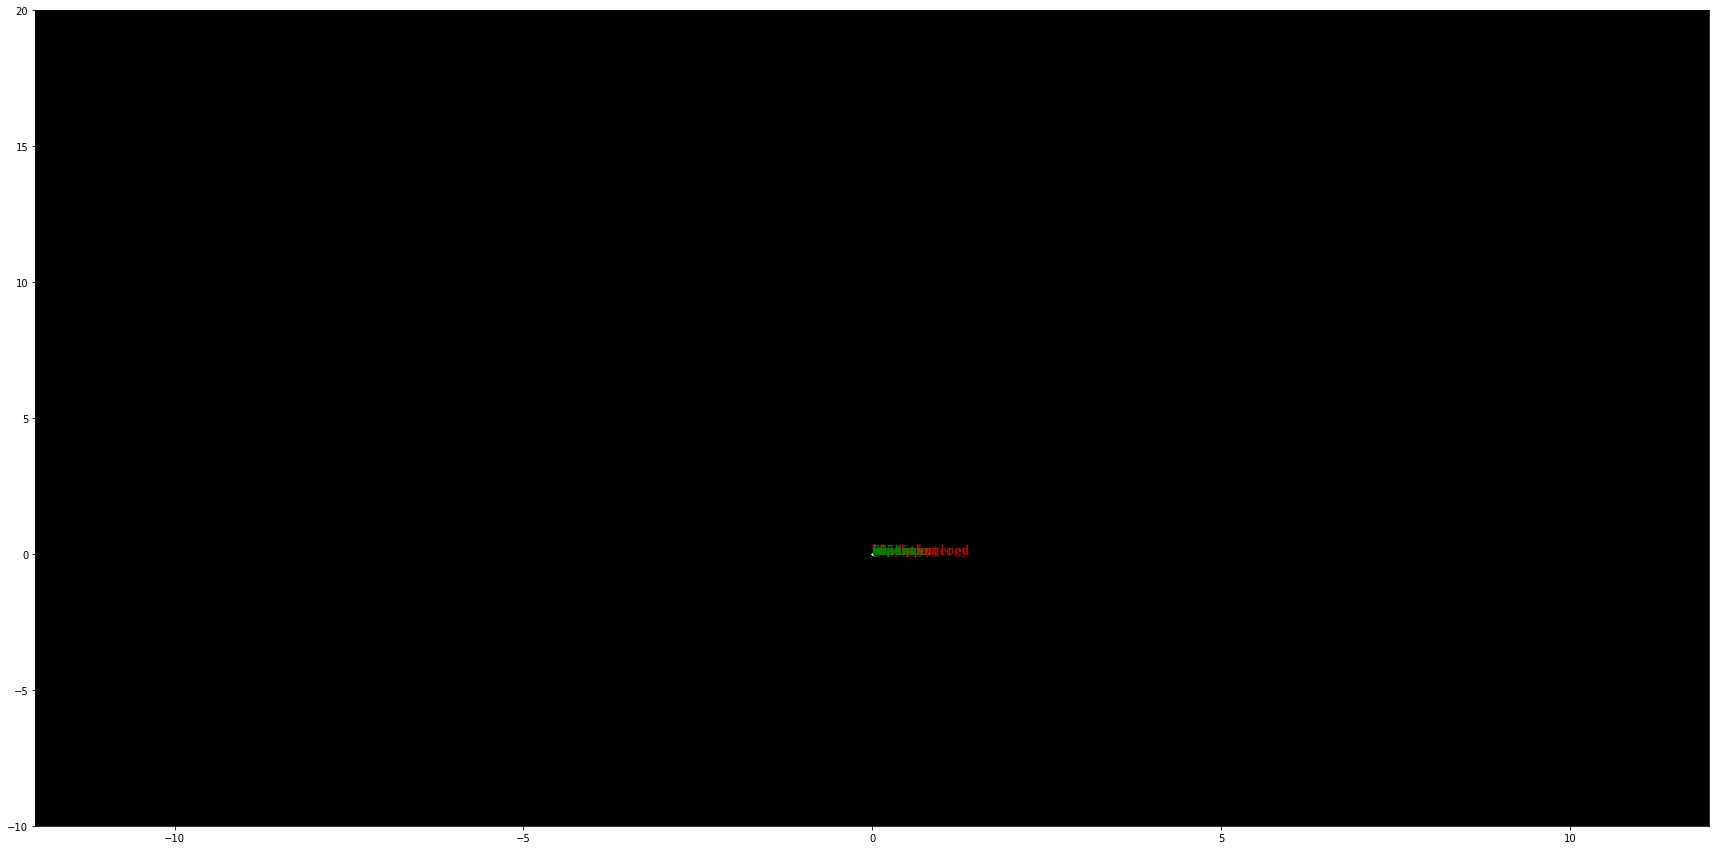

In [15]:

fig=plt.figure(figsize=(30,15))
ax=fig.gca()
ax.set_facecolor('black')
ax.plot(x_reduced[:,0],x_reduced[:,1],'.',markersize=1,alpha=0.1,color='white')
ax.set_xlim([-12,12])
ax.set_ylim([-10,20])

words={"history","chongqing"}
all_words=[]
for l in words:
    lst=model.most_similar(l)
    wds=[ll[0] for ll in lst ]
    metrics=[mm[1] for mm in lst]
    wds=np.append(wds,l)
    all_words.append(wds)


font1=matplotlib.font_manager.FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=15)
colors=['red','green']
for num,wds in enumerate(all_words):
    for s in wds:
        if s in word2ind:
            ind=word2ind[s]
            xy=x_reduced[ind]
            plt.plot(xy[0],xy[1],'-',alpha=1,color=colors[num])
            plt.text(xy[0],xy[1],s,fontproperties=font1,alpha=1,color=colors[num])

plt.savefig("./word_pca.jpg")
plt.show()



### TSNE 降维

In [16]:

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2,learning_rate=100).fit_transform(train_model.wv[train_model.wv.index2word])


In [17]:
train_model.wv.index2word[0]

'xi'

## 此图有误区，可以不用 word2vec 不知道结果怎么使用

In [ ]:
import random
random_word = random.sample(train_model.wv.index2word,50)

from matplotlib.font_manager import *  
import matplotlib.pyplot as plt 
#解决负号'-'显示为方块的问题  
plt.figure(figsize=(30, 20)) 
plt.rcParams['savefig.dpi'] = 1000 #图片像素
plt.rcParams['figure.dpi'] = 800 #分辨率
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')

plt.scatter(X_tsne[:,0],X_tsne[:,1])
#for i in range(len(X_tsne)):
#    x=X_tsne[i][0]
#    y=X_tsne[i][1]
#    plt.text(x , y ,random_word[i], fontproperties= myfont,size = 88)


words={"history","chongqing","human"}
all_words=[]
for l in words:
    lst=model.most_similar(l)
    wds=[ll[0] for ll in lst ]
    metrics=[mm[1] for mm in lst]
    wds=np.append(wds,l)
    all_words.append(wds)


font1=matplotlib.font_manager.FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=15)
colors=['red','green','yellow']
for num,wds in enumerate(all_words):
    for s in wds:
        if s in word2ind:
            ind=word2ind[s]
            xy=X_tsne[ind]
            plt.plot(xy[0],xy[1],'-',alpha=1,color=colors[num])
            plt.text(xy[0],xy[1],s,fontproperties=font1,alpha=1,color=colors[num])


#plt.savefig("./word_tsne.jpg")
#plt.figure.savefig("./word_tsne.jpg", bbox_inches='tight')
plt.show()


<Figure size 24000x16000 with 0 Axes>

In [24]:
train_model.most_similar(['music'])

E:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('standards', 0.37522363662719727),
 ('quiet', 0.3635973036289215),
 ('whizzed', 0.33233073353767395),
 ('streets', 0.32790181040763855),
 ('respondents', 0.32178935408592224),
 ('business', 0.31774646043777466),
 ('forebears', 0.31458353996276855),
 ('pudgy', 0.30746516585350037),
 ('mist', 0.30250680446624756),
 ('aff1', 0.29533714056015015)]

## 情感分析  使用csv 数据   SnowNLP 好像大部分是负向的，需要求证是否正确

In [19]:
from snownlp import SnowNLP

In [22]:
print(train_data[9].iloc[0])

whom 69% (1048) were women, to understand the relationship between chronic TMD and GERD and to determine if anxiety, somatization and depression influence the association. They found symptomatic GERD was a risk factor for TMD, and people with a longer history of GERD had a higher risk of TMD than those with a shorter history. # " The interactions between chronic musculoskeletal diseases, gastrointestinal diseases, mental disorders and sleep problems are complicated, " writes Dr. Jihua Chen, The Dental College of Georgia, Augusta, Georgia, and The Fourth Military Medical University, Xi'an, China, with coauthors. " There is evidence to support the bidirectional nature of the associations among these comorbidities, and patients may be stuck in a cycle in which undermined sleep, somatization and anxiety exacerbate the pain, with the pain also leading to sleep problems and mental disorders. " # The authors suggest physicians need to be aware of the association and consider multidisciplinary

In [23]:
# 第一条数据的情感
text=train_data[9].iloc[0]
s = SnowNLP(text)
s.sentiments

#output : 0.14448966846220868

3.001154880166723e-11

[0.08520902585136958, 1.3791190411893695e-12, 0.05846664588101791, 0.1570370754786512, 0.047920348638093135, 0.0013294102929680696, 0.00500968177072858, 0.04334978684132251, 0.036376049724791804, 0.030936124458867953, 0.006173446161520935, 0.005561374752728443, 0.236864315697075, 0.04334978684132251, 0.011120698862846057, 0.13118790557022608, 0.1570370754786512, 0.8535602575415137, 0.09501225574037198, 0.07541426254933747, 0.004570606183363135, 0.06932756830705156, 0.016734469799581486, 0.09501225574037198, 0.14887869234694406, 0.22091695429925684, 0.17144602564591438, 0.06838858375547174, 0.10443518621765868, 0.3347327635442108, 0.00749574700253397, 0.024229015241810092, 0.009109720840610014, 0.0030551278547963356, 0.009692981897842623, 0.15481779766628512, 0.026495653549123976, 0.14571593231755942, 0.2395217615025801, 0.022249718818997954, 0.024652936129934355, 0.1089828029100175, 0.04278295631474671, 0.052946134564149205, 0.024229015241810092, 0.0110575923299977, 0.03011364484518486

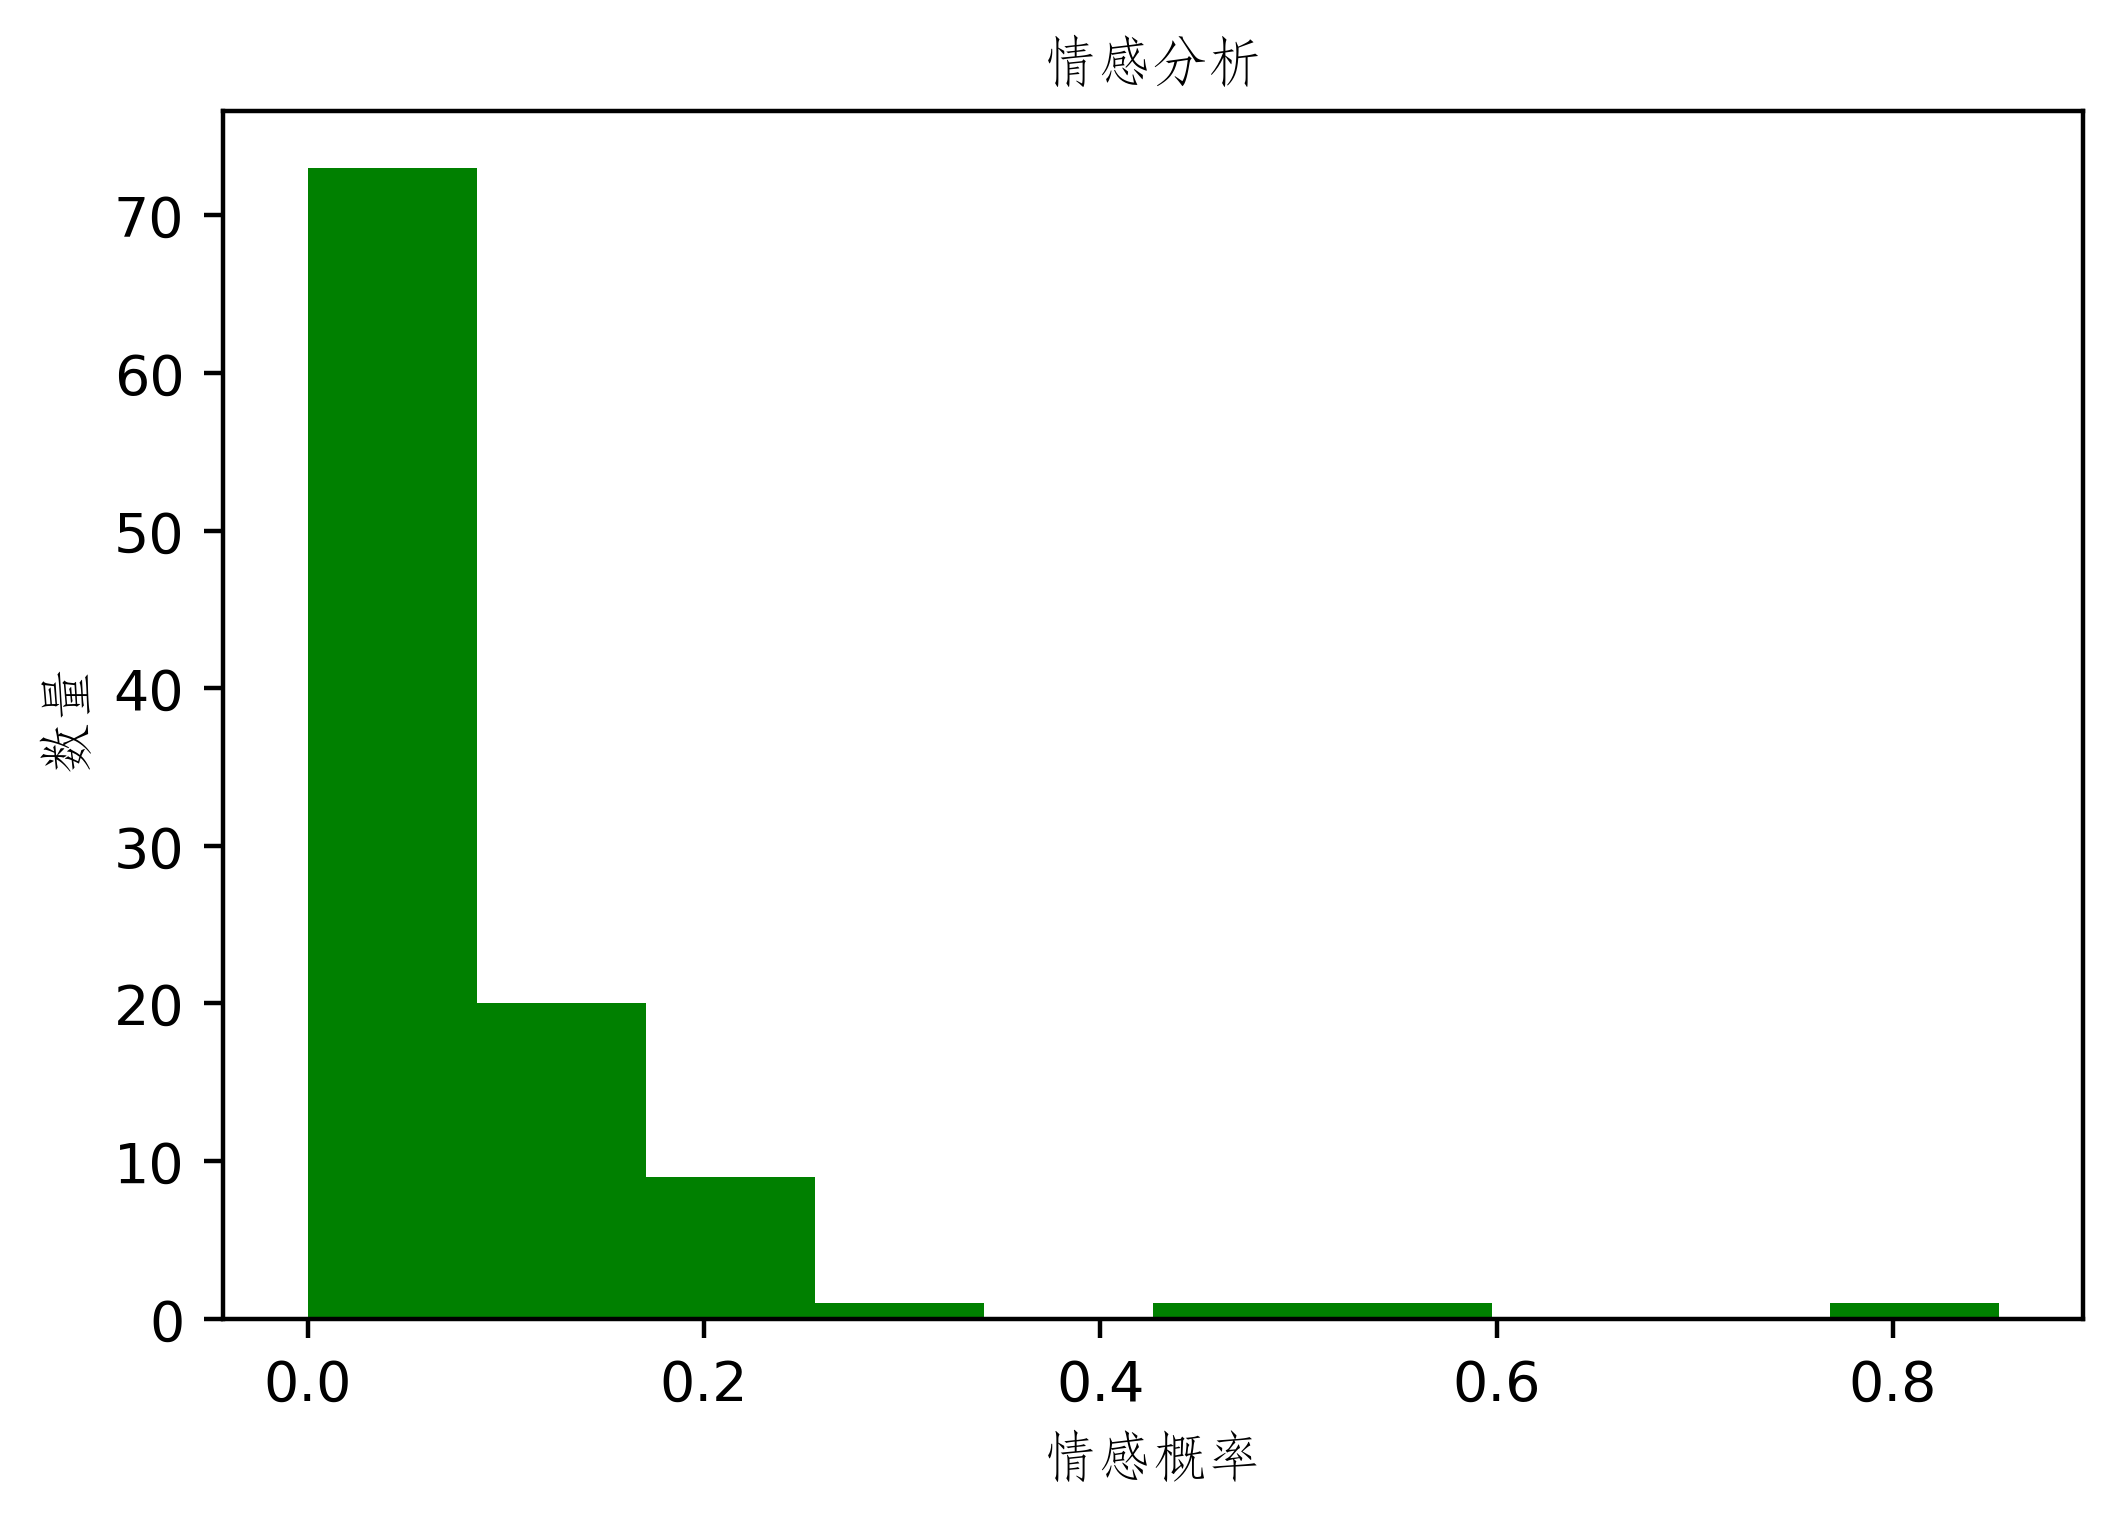

In [86]:
from snownlp import SnowNLP
from matplotlib.font_manager import FontProperties


list = train_data[7]
sentimentslist = []
for i in list:
    s = SnowNLP(i)
    sentimentslist.append(s.sentiments)
print(sentimentslist)
print(len(sentimentslist))
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.hist(sentimentslist, bins=10, facecolor='g')
plt.xlabel('情感概率', fontproperties= myfont)
plt.ylabel('数量', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
plt.savefig("word_snowNLP.jpg")
plt.show()

In [12]:

#print(sentimentslist.mean()) #把所有的情感分析结果数值做一下平均
#print(sentimentslist.median()) #中位数

#Out[68]:0.14509066130717937
#Out[69]:0.03290747545743877
#过低，明显有问题（因为对英文文本用了snownlp，snownlp针对中文效果好）

## TextBlob 英文情感分析 情感极性0.8，主观性1.0。说明一下，情感极性的变化范围是[-1, 1]，-1代表完全负面，1代表完全正面

polarity：情感积极消极在[-1,1]之间，越接近-1越消极，越接近1越积极
subjectivity：主观客观在[0,1]之间，越接近1越主观

In [2]:
import sys
sys.path

['',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\python35.zip',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\DLLs',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\win32',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\win32\\lib',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\Pythonwin',
 'E:\\ProgramData\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Administrator\\.ipython']

In [3]:
import nltk

In [4]:
from textblob import  TextBlob
text = "I am happy today. I feel sad today."
blob = TextBlob(text)
blob

TextBlob("I am happy today. I feel sad today.")

In [17]:
print(blob.sentences)
print(blob.sentences[0].sentiment)
print(blob.sentences[1].sentiment)
print(blob.sentiment)


[Sentence("I am happy today."), Sentence("I feel sad today.")]
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.15000000000000002, subjectivity=1.0)


In [19]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

text          = "I feel the product is so good" 

sent          = TextBlob(text)
# The polarity score is a float within the range [-1.0, 1.0]
# where negative value indicates negative text and positive
# value indicates that the given text is positive.
polarity      = sent.sentiment.polarity
# The subjectivity is a float within the range [0.0, 1.0] where
# 0.0 is very objective and 1.0 is very subjective.
subjectivity  = sent.sentiment.subjectivity

sent          = TextBlob(text, analyzer = NaiveBayesAnalyzer())
classification= sent.sentiment.classification
positive      = sent.sentiment.p_pos
negative      = sent.sentiment.p_neg

print(polarity,subjectivity,classification,positive,negative)

0.7 0.6000000000000001 neg 0.4662003135404217 0.5337996864595786


In [88]:

list = train_data[7]+train_data[9]
sentimentslist = []
for i in list:
    s = TextBlob(i)
    sentimentslist.append(s.sentiment)
#print(sentimentslist)
print(len(sentimentslist))


106


No handles with labels found to put in legend.


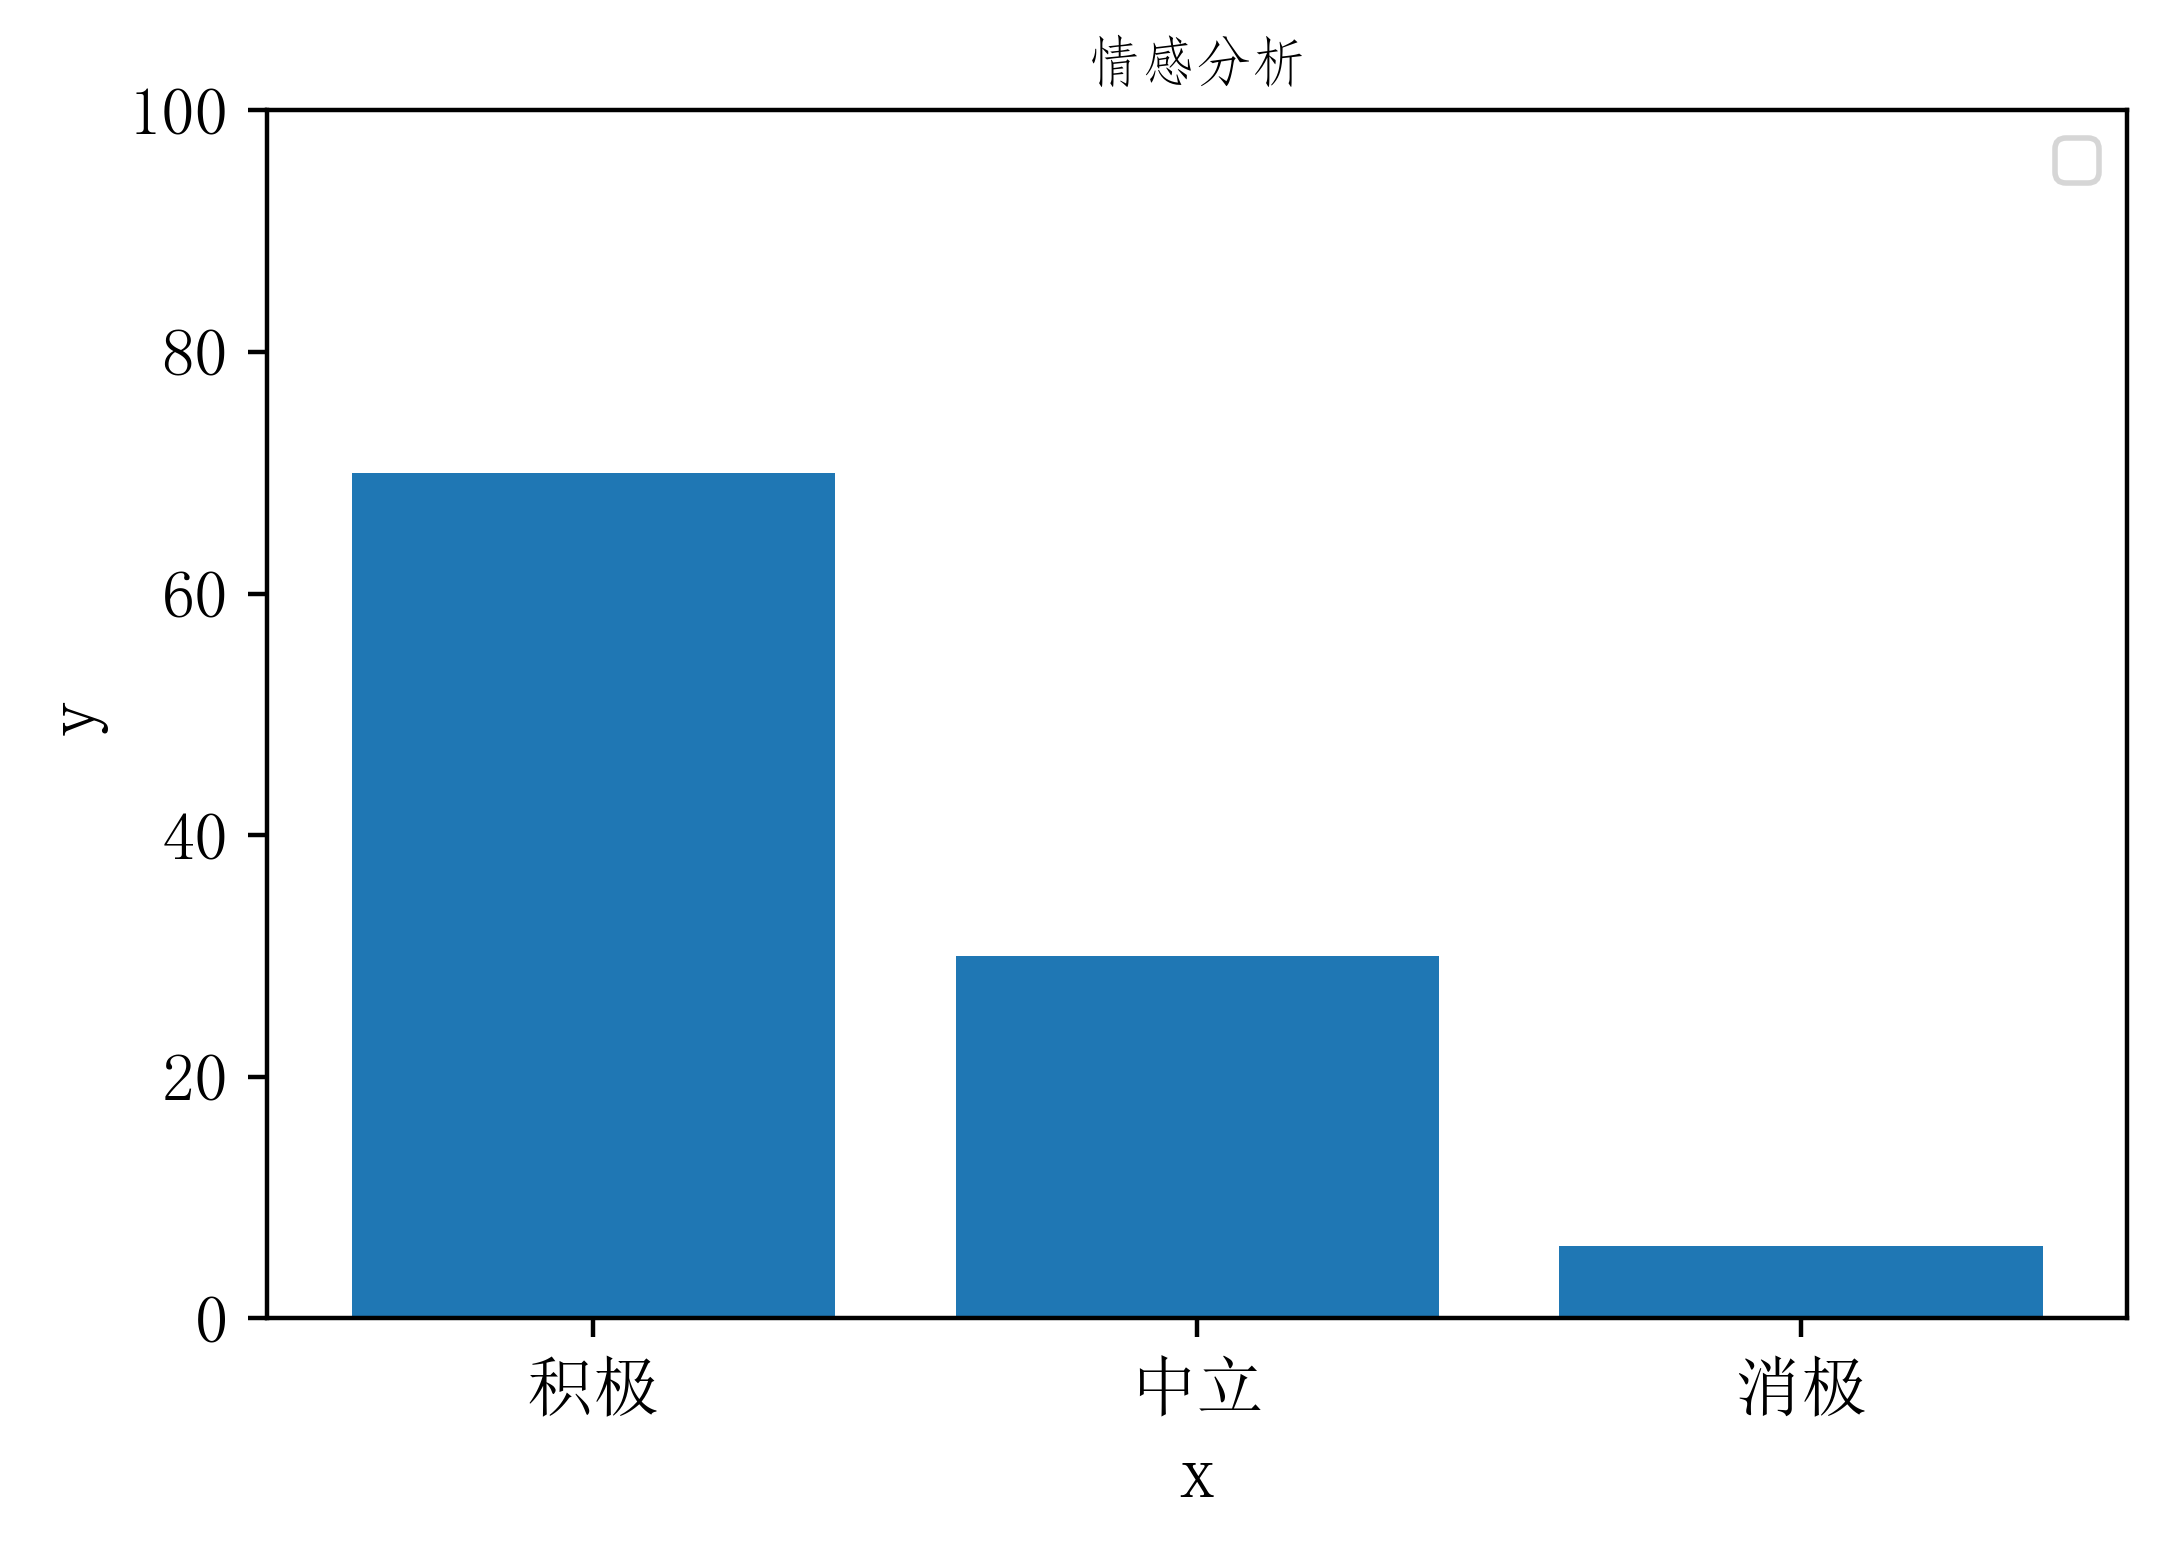

In [89]:
a, b, c = (0, 0, 0)
for each in sentimentslist:
    if each.polarity> 0.05:
        a += 1
    elif each.polarity> -0.03:
        b += 1
    else:
        c += 1
judge_txt = ['积极', '中立', '消极']
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
songTi = FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
plt.xticks(fontproperties=songTi,fontsize=12)
plt.yticks(fontproperties=songTi,fontsize=12)
plt.xlabel('x',fontproperties=songTi,fontsize=14)
plt.ylabel('y',fontproperties=songTi,fontsize=14)
plt.legend(prop=songTi,fontsize=12)

plt.bar(judge_txt, [a, b, c], align='center')
plt.title('情感分析', fontproperties= myfont)
plt.ylim([0, 100])
plt.savefig('条形图.png')





In [90]:
all = len(sentimentslist)
print("有{}的人对持积极看法，占比{}%".format(a, a / all))
print("有{}的人对持中立看法，占比{}%".format(b, b / all))
print("有{}的人对持消极看法，占比{}%".format(c, c / all))

有70的人对持积极看法，占比0.660377358490566%
有30的人对持中立看法，占比0.2830188679245283%
有6的人对持消极看法，占比0.05660377358490566%


In [91]:
a, b, c ,d,e= (0, 0, 0,0,0)
for each in sentimentslist:
    if each.polarity> 0.45:
        a += 1
    elif each.polarity> 0.05:
        b += 1
    elif each.polarity> -0.03:
        c += 1
    elif each.polarity> -0.43:
        d += 1
    elif each.polarity> -1:
        e += 1
    else:
        True


No handles with labels found to put in legend.


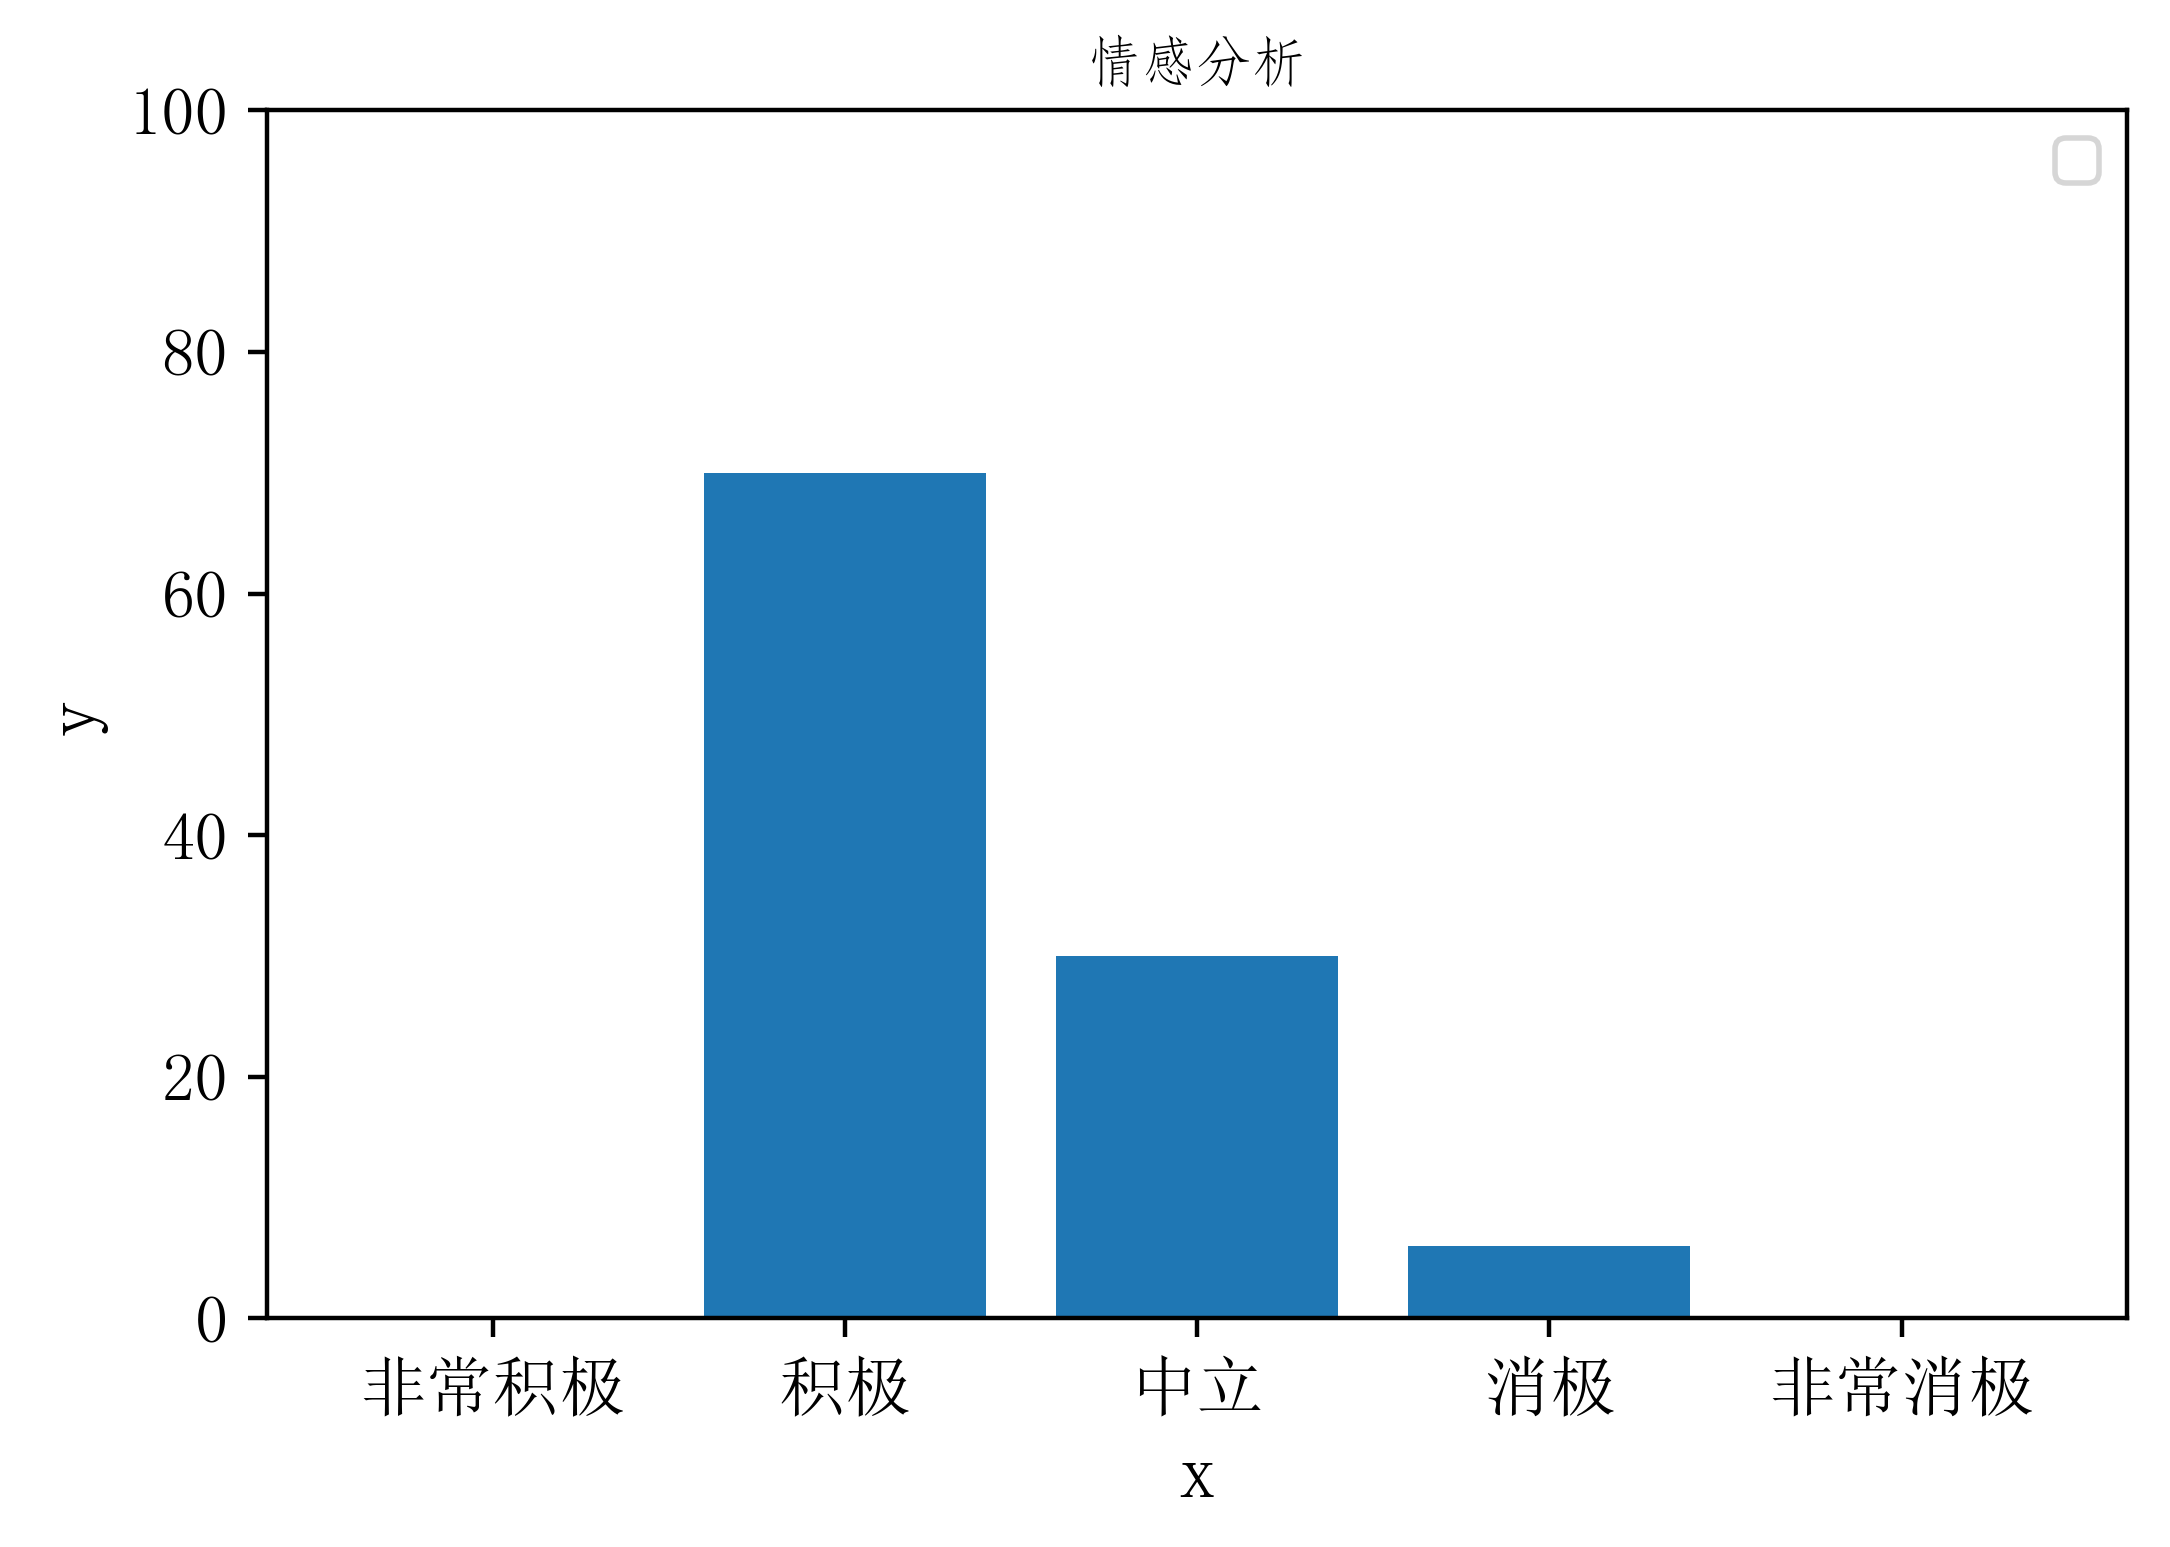

In [92]:

judge_txt = ['非常积极','积极', '中立', '消极','非常消极']
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
songTi = FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
plt.xticks(fontproperties=songTi,fontsize=12)
plt.yticks(fontproperties=songTi,fontsize=12)
plt.xlabel('x',fontproperties=songTi,fontsize=14)
plt.ylabel('y',fontproperties=songTi,fontsize=14)
plt.legend(prop=songTi,fontsize=12)

plt.bar(judge_txt, [a, b, c,d,e], align='center')
plt.title('情感分析', fontproperties= myfont)
plt.ylim([0, 100])
plt.savefig('条形图.png')





In [93]:
all = len(sentimentslist)
print("有{}的人对持非常积极看法，占比{}%".format(a, a / all))
print("有{}的人对持积极看法，占比{}%".format(b, b / all))
print("有{}的人对持中立看法，占比{}%".format(c, c / all))
print("有{}的人对持消极看法，占比{}%".format(d, d / all))
print("有{}的人对持非常消极看法，占比{}%".format(e, e / all))


有0的人对持非常积极看法，占比0.0%
有70的人对持积极看法，占比0.660377358490566%
有30的人对持中立看法，占比0.2830188679245283%
有6的人对持消极看法，占比0.05660377358490566%
有0的人对持非常消极看法，占比0.0%


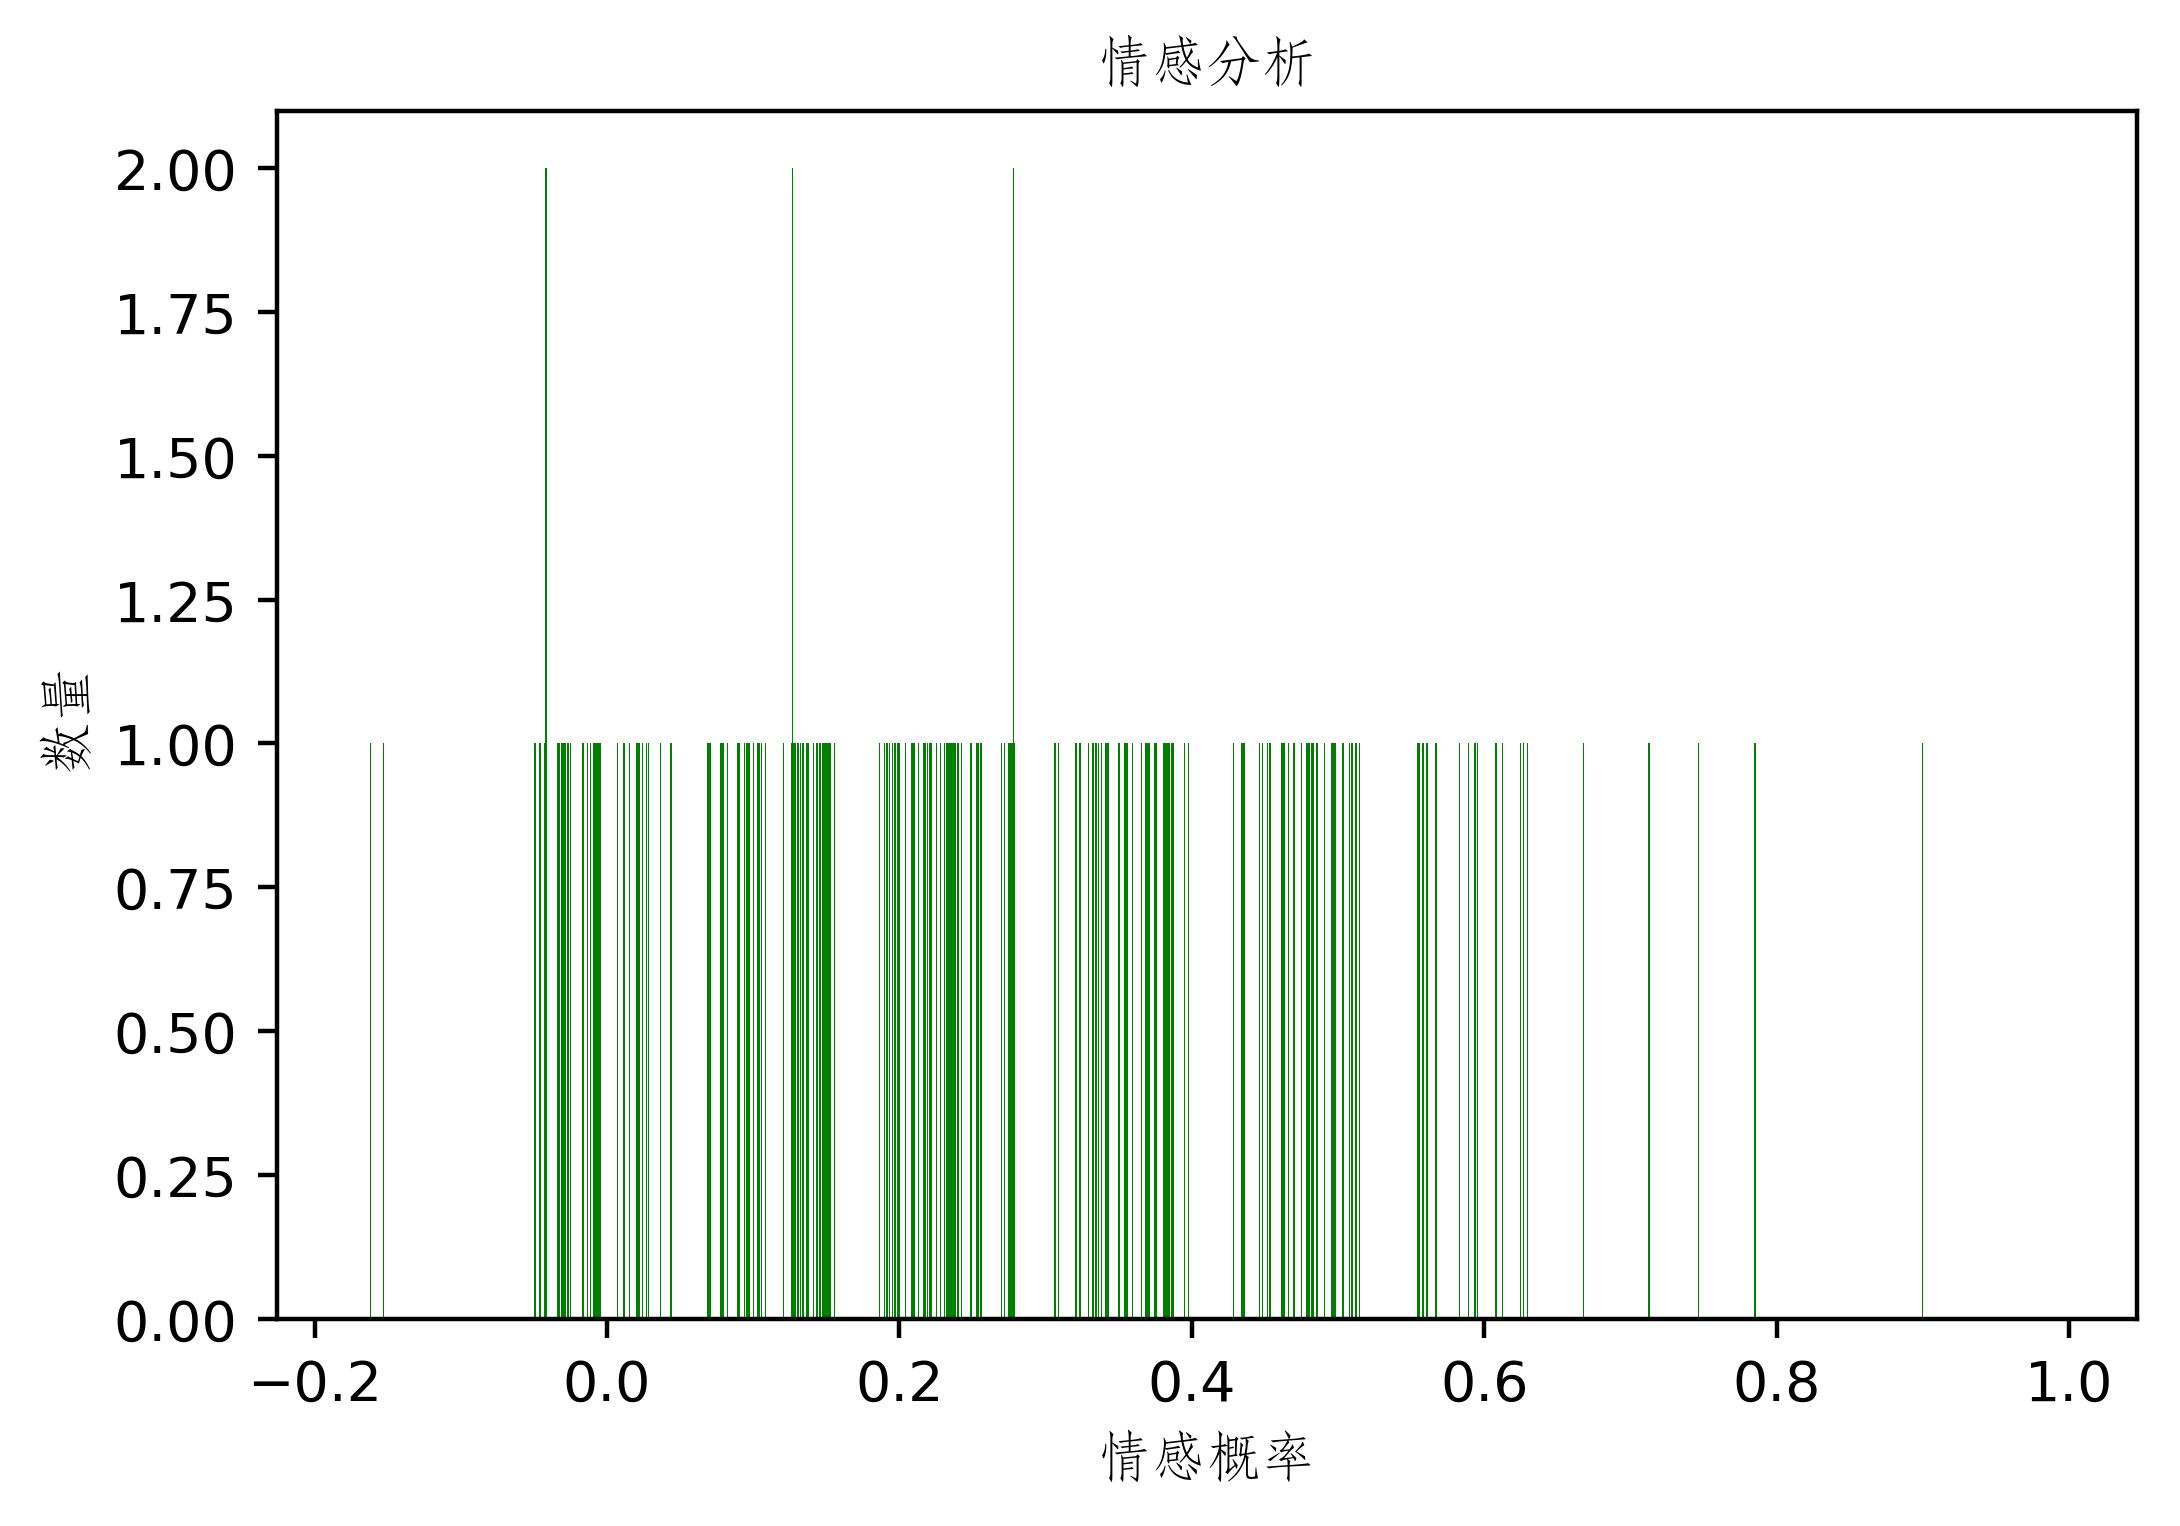

In [94]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.hist(sentimentslist, bins=10, facecolor='g')
plt.xlabel('情感概率', fontproperties= myfont)
plt.ylabel('数量', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
plt.show()

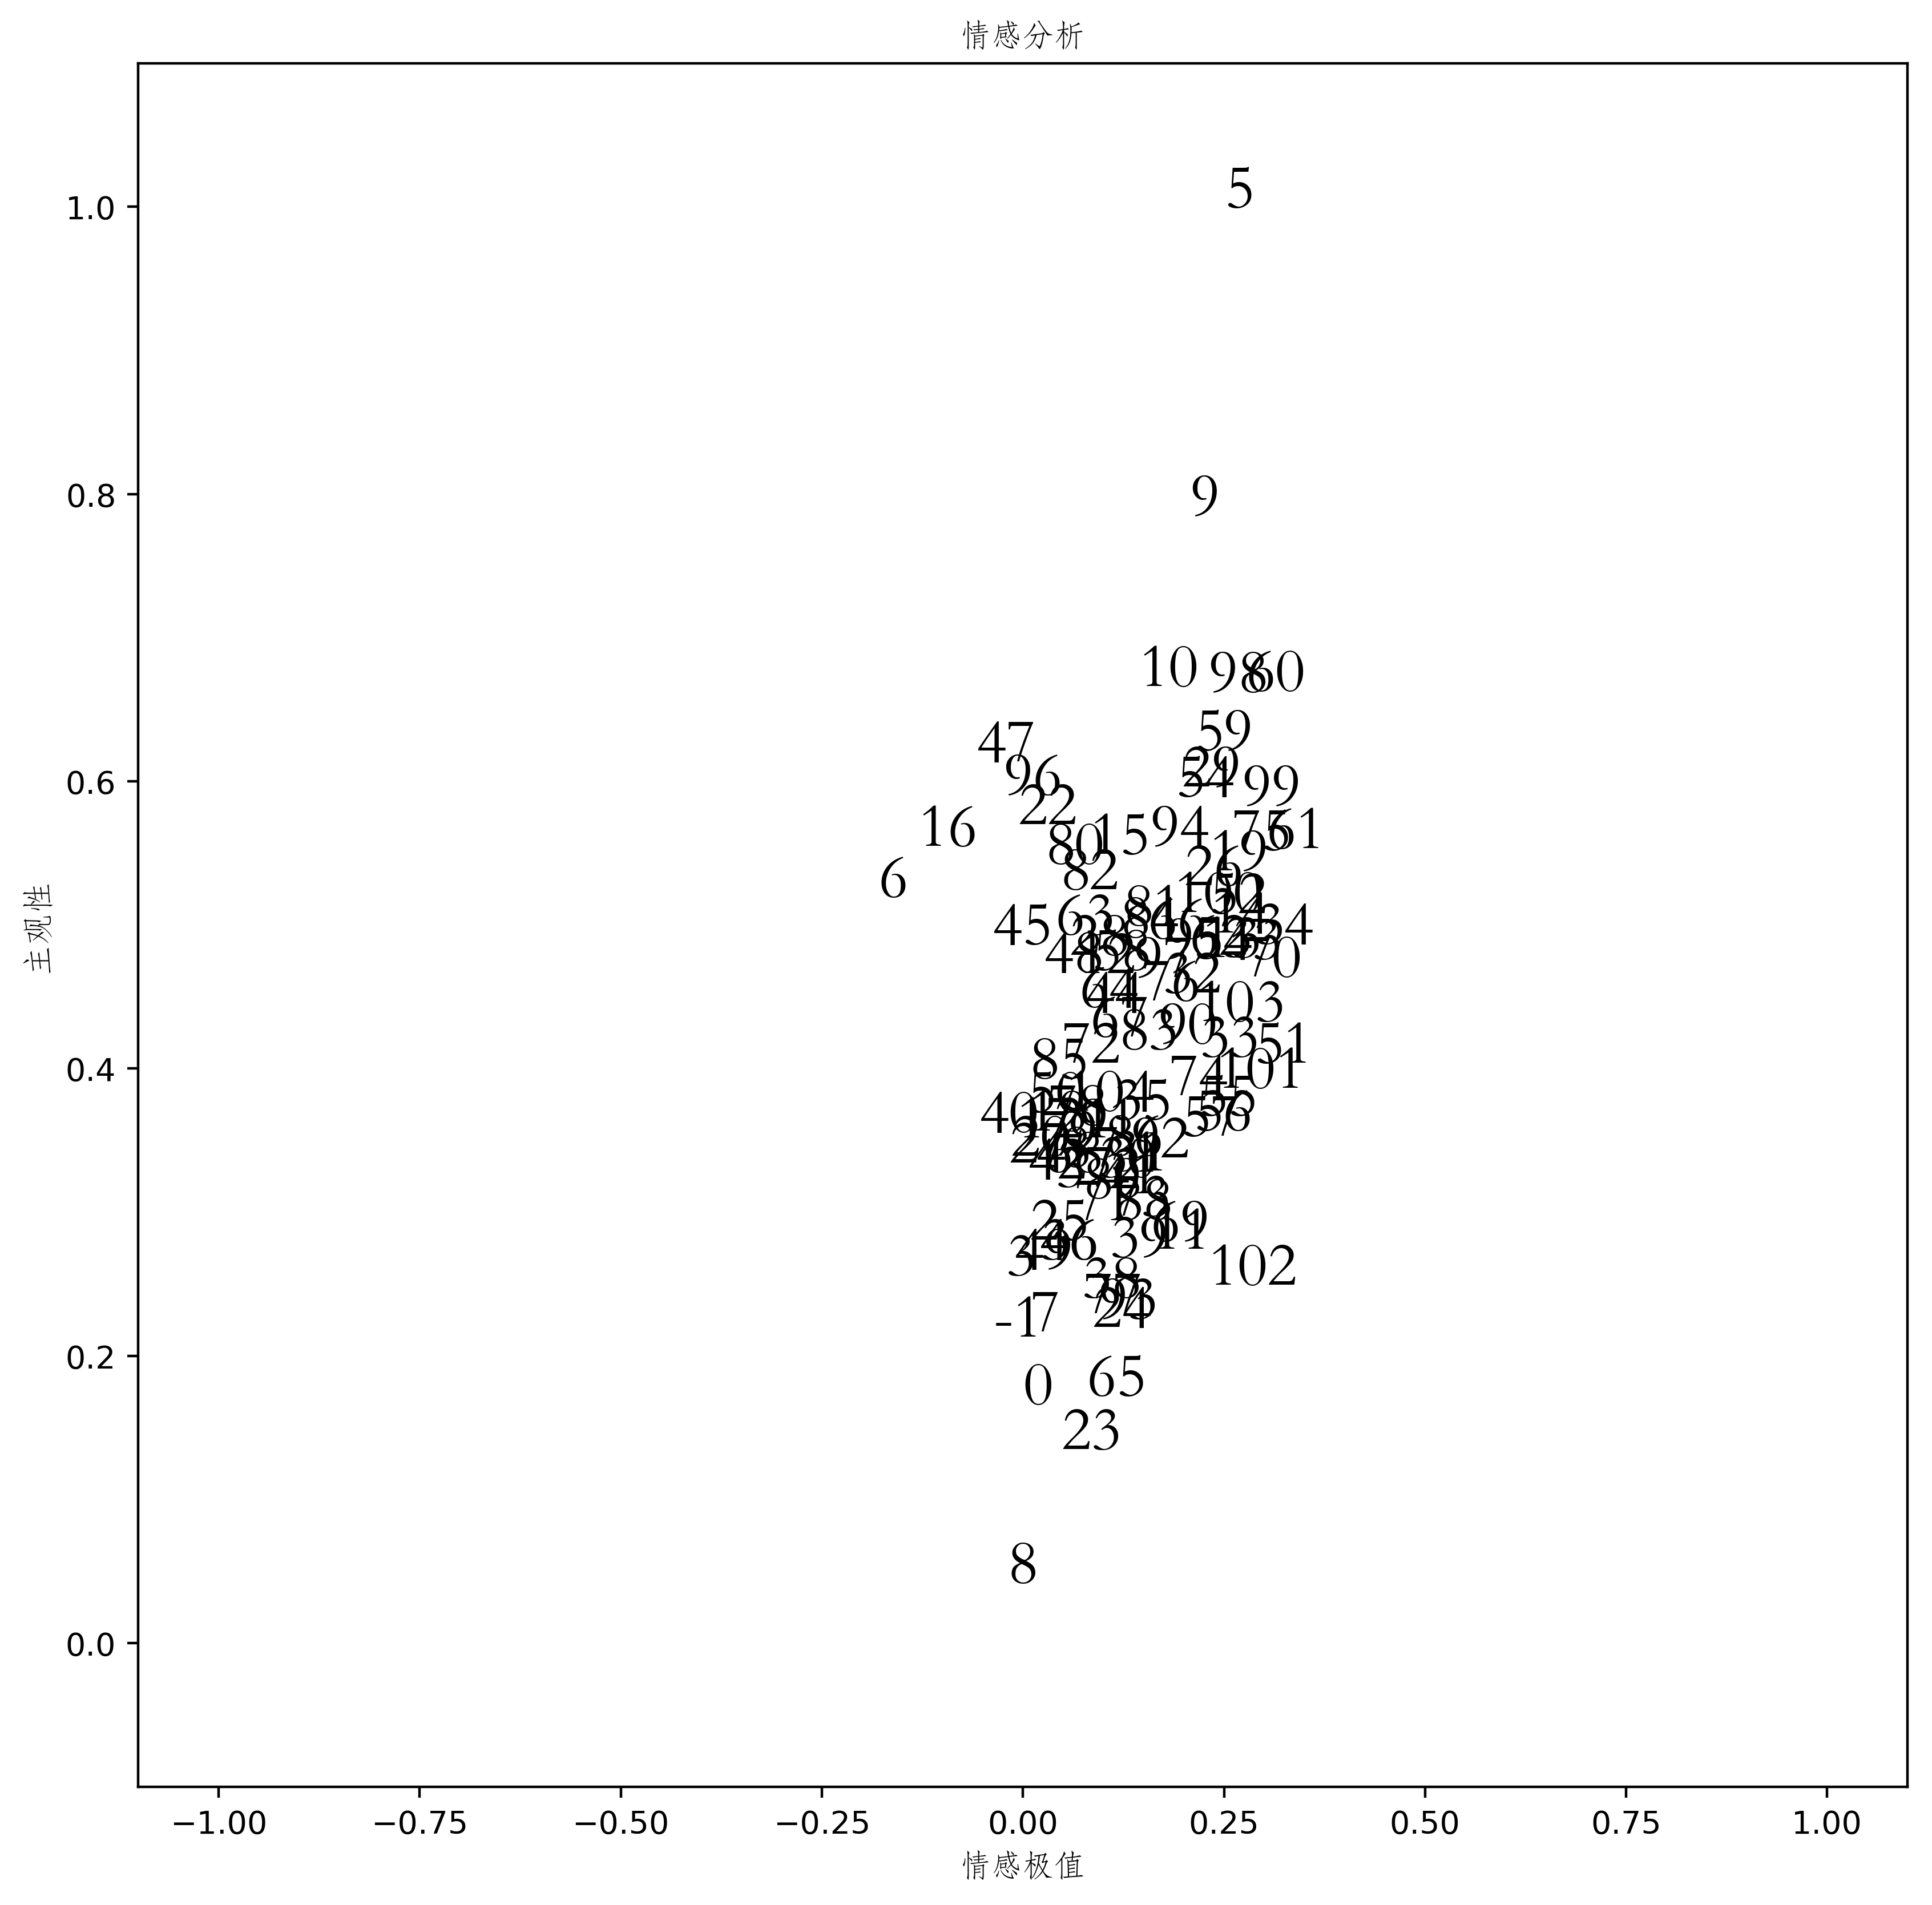

In [95]:
import matplotlib.pyplot as plt 
#解决负号'-'显示为方块的问题  
plt.figure(figsize=(10, 10)) 
plt.rcParams['savefig.dpi'] = 400 #图片像素
plt.rcParams['figure.dpi'] = 400 #分辨率
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.xlim((-1.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.xlabel('情感极值', fontproperties= myfont)
plt.ylabel('主观性', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
#plt.scatter(sentimentslist[:,0],sentimentslist[:,1])
for i in range(len(sentimentslist)):
    x=sentimentslist[i][0]
    y=sentimentslist[i][1]
    plt.text(x , y,(i-1), fontproperties= myfont,size = 20)
plt.savefig("textblob.jpg")
plt.show()
#plt.figure.savefig("tsnefig", bbox_inches='tight')



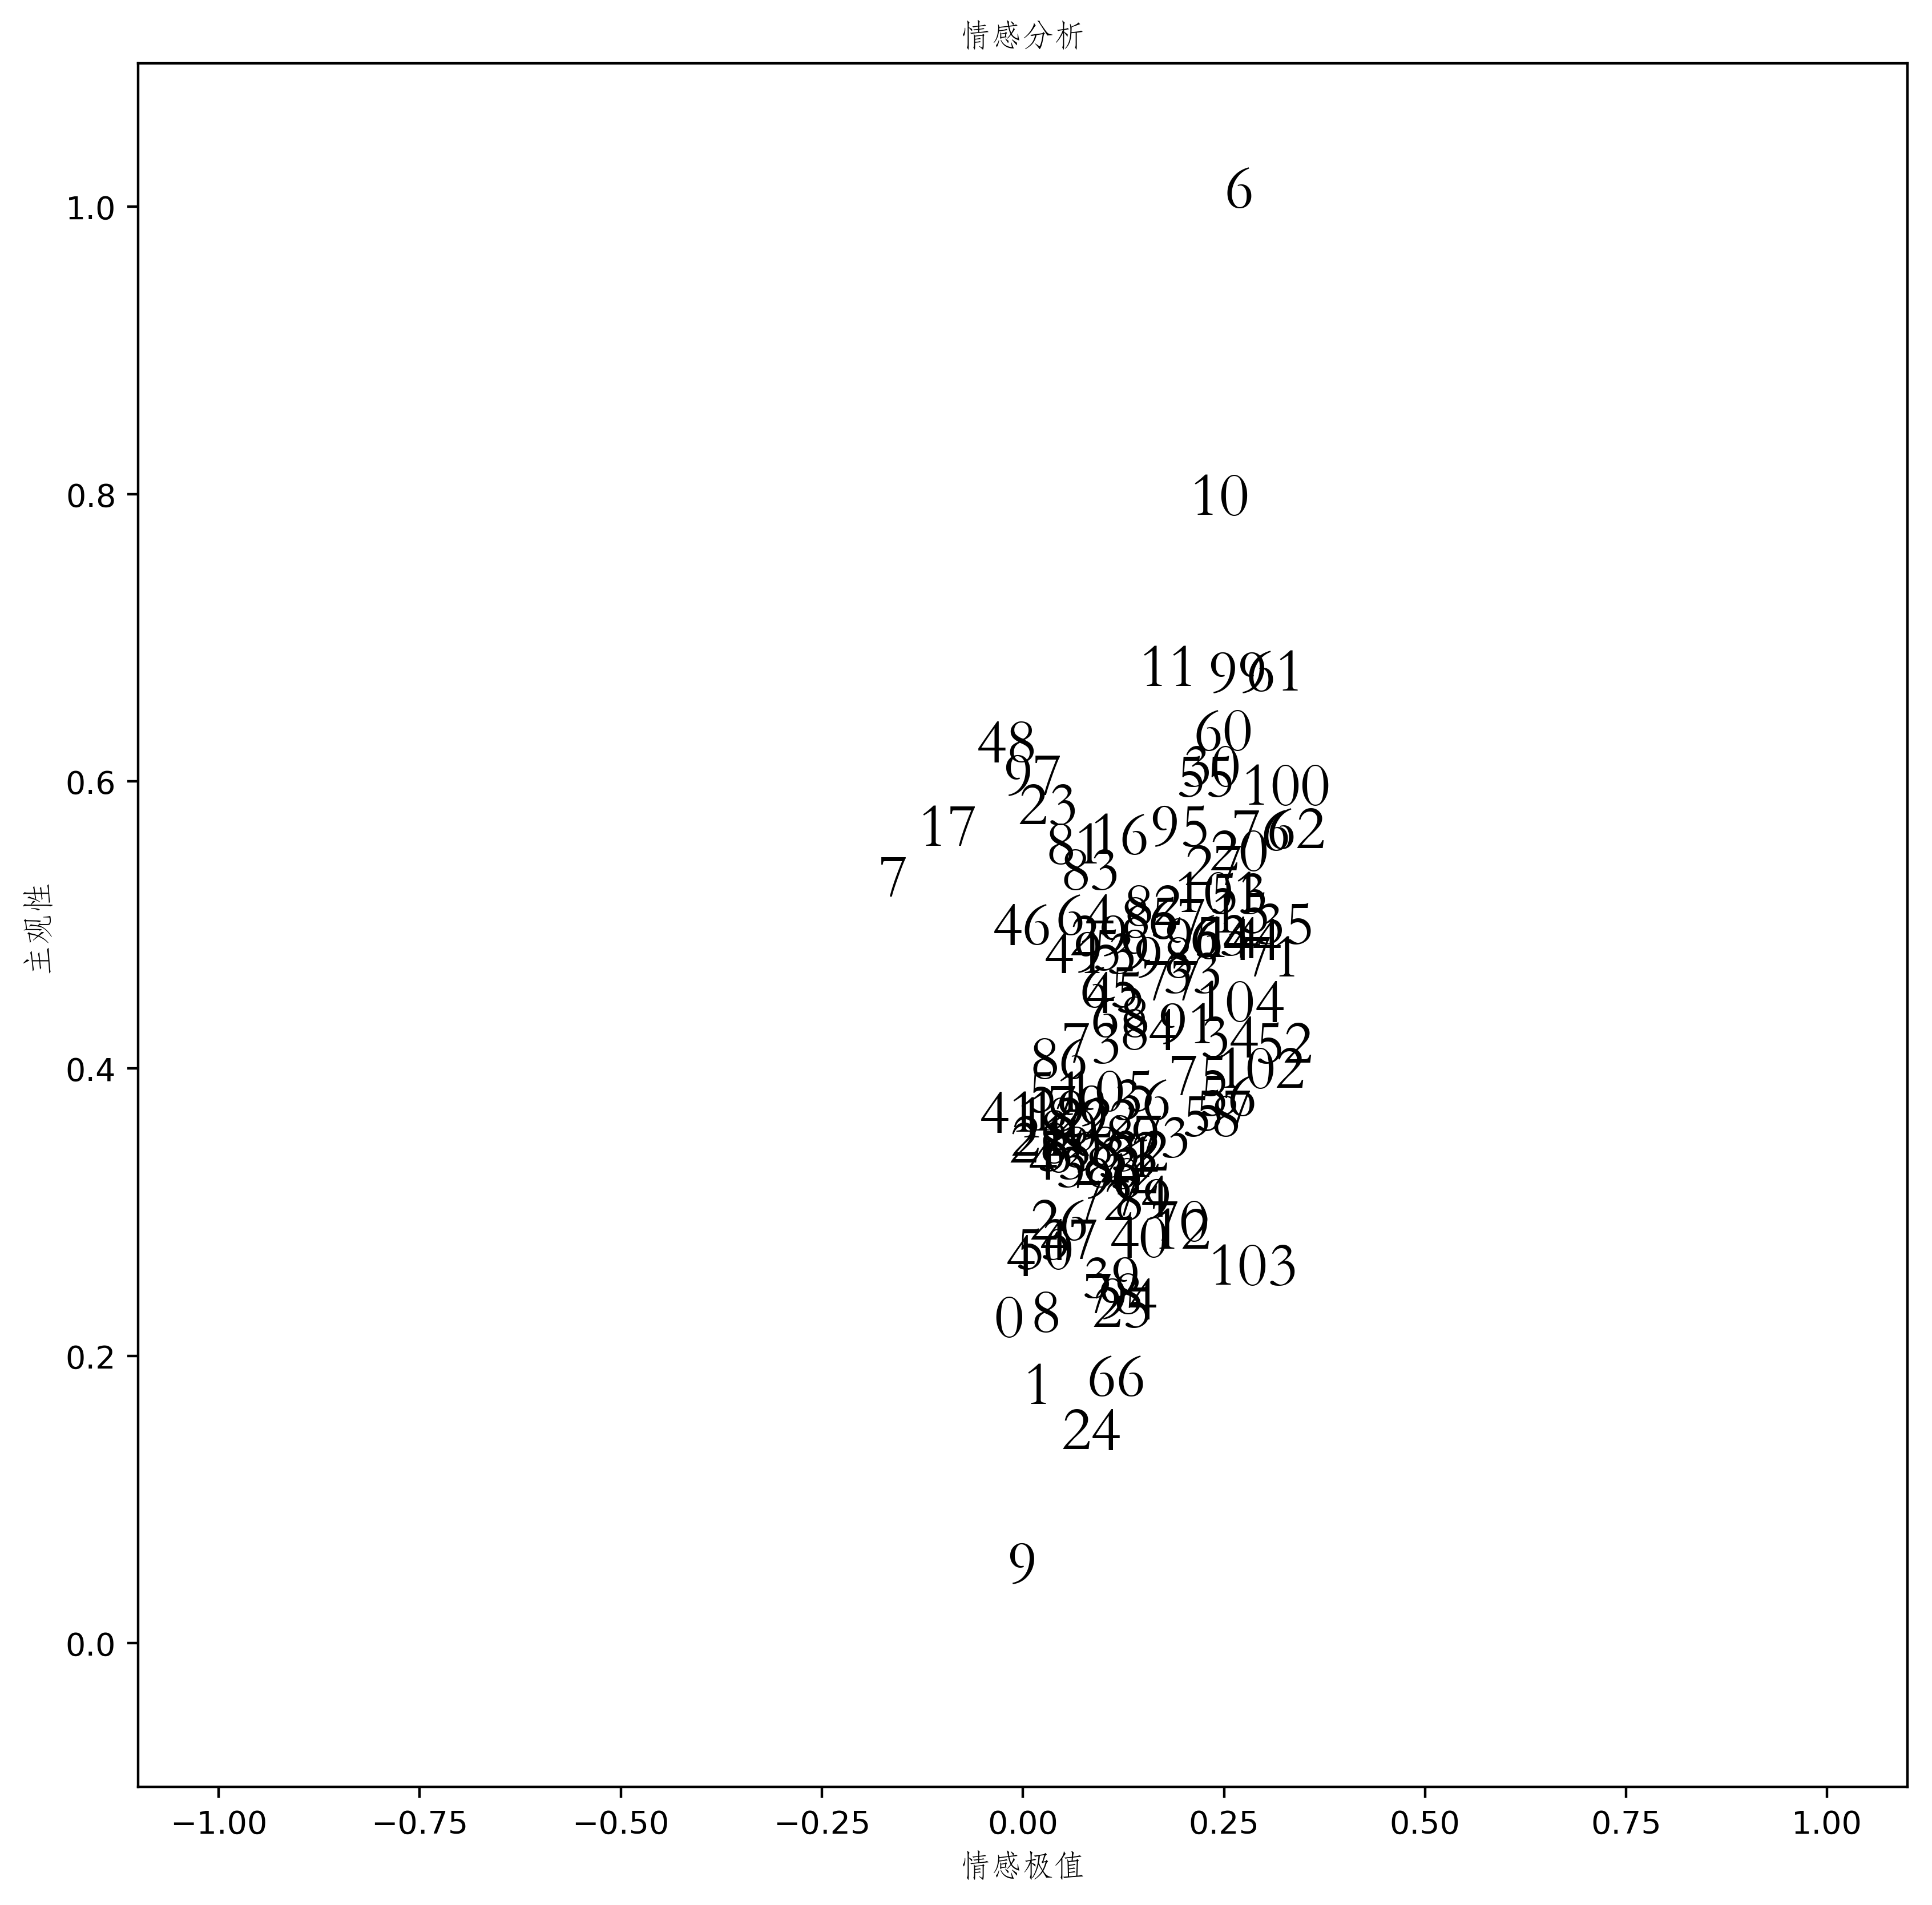

In [96]:
import matplotlib.pyplot as plt 
#解决负号'-'显示为方块的问题  
plt.figure(figsize=(10, 10)) 
plt.rcParams['savefig.dpi'] = 400 #图片像素
plt.rcParams['figure.dpi'] = 400 #分辨率
myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
plt.xlim((-1.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.xlabel('情感极值', fontproperties= myfont)
plt.ylabel('主观性', fontproperties= myfont)
plt.title('情感分析', fontproperties= myfont)
#plt.scatter(sentimentslist[:,0],sentimentslist[:,1])
for i in range(len(sentimentslist)):
    x=sentimentslist[i][0]
    y=sentimentslist[i][1]
    plt.text(x , y,i, fontproperties= myfont,size = 20)
plt.savefig("textblob.jpg")
plt.show()
#plt.figure.savefig("tsnefig", bbox_inches='tight')



In [97]:
import jieba
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud




In [1]:
#从文件导入停用词表
stpwrdpath = "stop_words.txt"
stpwrd_dic = open(stpwrdpath,encoding='utf8')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrd_dic.close()
#print(stpwrdlst)
stpwrdlst;

In [119]:
def create_word_cloud():
    # 设置词云形状图片,numpy+PIL方式读取图片
    wc_mask = np.array(Image.open('background.jpg'))
    # 数据清洗词列表
    stop_words = ['就是', '不是', '但是', '还是', '只是', '这样','可以','因为', '这个', '一个', '什么', '电影', '没有']
    # 设置词云的一些配置，如：字体，背景色，词云形状，大小,生成词云对象
   # wc = WordCloud(mask=wc_mask, background_color="white",stopwords=stpwrdlst, max_words=50, scale=4,max_font_size=50, random_state=42,font_path="C:/Windows/Fonts/STFANGSO.TTF")
    wc=WordCloud(mask=wc_mask, background_color="white",width=1500,height=960,max_font_size=100, stopwords=stpwrdlst,random_state=42,font_path="C:/Windows/Fonts/STFANGSO.TTF")
    # 生成词云
    wc.generate("/".join(train_data[9]))
    # 在只设置mask的情况下,你将会得到一个拥有图片形状的词云
    # 开始画图
#    plt.imshow(wc, interpolation="bilinear")
    plt.imshow(wc)
    # 为云图去掉坐标轴
    plt.axis("off")
    plt.figure()
    plt.show()
    wc.to_file('word_wordCloud.png')

In [121]:
"/".join(train_data[9])
print(1)

1


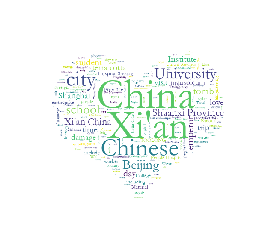

<Figure size 432x288 with 0 Axes>

In [122]:
create_word_cloud()

In [65]:
import nltk
#print(nltk.word_tokenize("".join(train_data[9])))
#print(nltk.pos_tag(nltk.word_tokenize("".join(train_data[9])))) #对分完词的结果进行词性标注


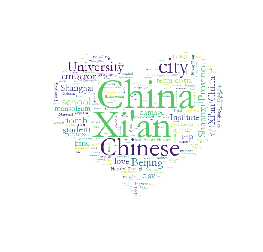

<Figure size 432x288 with 0 Axes>

In [107]:
create_word_cloud()